# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [103]:
import pandas as pd

In [104]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [105]:
import seaborn as sns

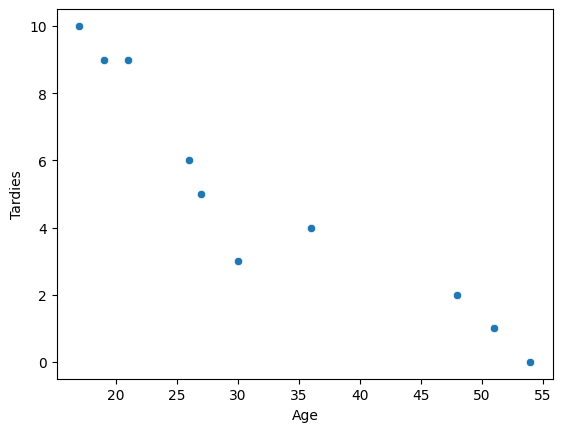

In [106]:
sns.scatterplot(x = "Age", y="Tardies", data = student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [107]:
import statsmodels.formula.api as smf
cov = student_data['Age'].cov(student_data['Tardies'])
cov

-45.56666666666666

In [108]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [109]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Plot your regression model on your scatter plot.

In [110]:
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [111]:
lr = LinearRegression()

In [112]:
lr.fit(
    X = student_data[["Age"]], 
    y = student_data.Tardies)

LinearRegression()

In [113]:
coef_ = lr.coef_
coef_

array([-0.24282077])

This coefficient represents the change in the number of tardies for a unit change in the age of the students. In this case, a negative coefficient suggests that there is a negative relationship between age and tardies. As the age increases, the number of tardies tends to decrease.

In [114]:
intercept_ = lr.intercept_
intercept_

12.888803363135771

In [115]:
def what_age (Age):
    coef_ = lr.coef_
    intercept_ = lr.intercept_
    result =  Age * coef_ + intercept_

    return result[0]

In [124]:
Prediction1=what_age(50)
Prediction1

0.7477648173367264

In [125]:
from matplotlib import pyplot as plt

AttributeError: 'DataFrame' object has no attribute 'Prediction1'

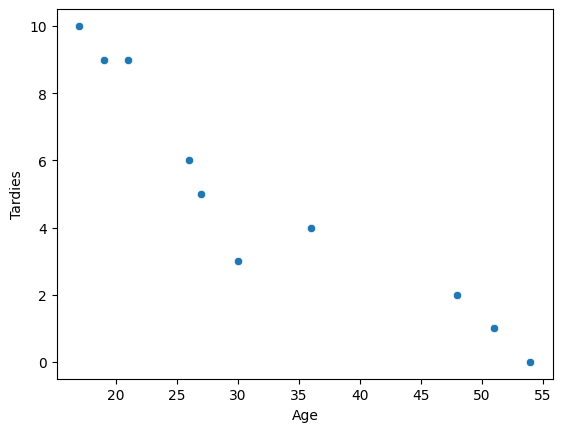

In [141]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data.Prediction1, c="green", label="Prediction")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
student_data["error_1"] = (student_data.Tardies - student_data.Prediction1).abs()

In [127]:
mean_absolute_error_1 = sum(student_data.error_1) / len(student_data) 
mean_absolute_error_1

AttributeError: 'DataFrame' object has no attribute 'error_1'

In [128]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


In [129]:
RSS = ((student_data.Prediction1 - student_data.Tardies) ** 2).sum()
RSS

AttributeError: 'DataFrame' object has no attribute 'Prediction1'

In [130]:
TSS = ((student_data.Prediction1 - student_data.Tardies.mean()) ** 2).sum()
TSS

AttributeError: 'DataFrame' object has no attribute 'Prediction1'

In [131]:
r_2=1-RSS/TSS
r_2

0.8662472876855261

The model is close to the prediction

0.93 indicates the average absolute difference between the actual tardiness values and the predicted tardiness values by the linear regression model. In other words, on average, the model's predictions deviate from the true tardiness values by approximately 0.93. A lower MAE value suggests a better fit of the model to the data.

From the regression model and the scatter plot, we can conclude that there is a negative relationship between age and tardiness. As the age increases, the number of tardies tends to decrease.

Based on the given information, age can be considered as a reasonable predictor of tardiness, as there is a negative relationship observed.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [132]:
import pandas as pd

In [133]:
df = pd.read_csv('vehicles.csv')
df.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
2299,BMW,550i xDrive Gran Turismo,2017,4.4,8.0,Automatic (S8),All-Wheel Drive,Large Cars,Premium,18.311667,15,24,18,486.0,2250


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [134]:
corr = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [135]:
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [136]:
lr = LinearRegression()

In [137]:
lr.fit(
    X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']],
    y = df['CO2 Emission Grams/Mile'])

LinearRegression()

In [138]:
coef_ = lr.coef_
coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [139]:
intercept_ = lr.intercept_
intercept_

769.8882836465675

In [140]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                             18:44:46   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 